In [317]:
import numpy as np
import pandas as pd
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [318]:
trainSet = pd.read_csv('data/Train.csv') # load training set from CSV file
trainSet

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,1,1,2.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1759,40,200,5.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1760,96,218,2.2708,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1761,16,81,5.0625,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [319]:
testSet = pd.read_csv('data/Test.csv') # load testing set from CSV file
testSet

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558
0,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,108.0,179.0,1.6574,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60.0,120.0,2.0000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
752,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
753,12.0,101.0,8.4166,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
754,31.0,88.0,2.8387,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [320]:
# use train set as test set is classless so it is meant for unsupervised learning
x = trainSet.drop('Class', axis = 1) # set everything except for the class as the inputs
y = trainSet.Class # set class as the outputs
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 5) # use train_test_split to split dataset samples to training and testing sets

# apply standardization to data samples
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [321]:
model = KNeighborsClassifier(n_neighbors = 9, weights = 'distance', algorithm = 'ball_tree', leaf_size = 10)  # define KNN model with weight and algorithm change
model.fit(x_train, y_train) # train the model with the training inputs

KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=9,
                     weights='distance')

Training Set



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Training Set Accuracy Score:  0.9943
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1125
           1       1.00      0.94      0.97       109

    accuracy                           0.99      1234
   macro avg       1.00      0.97      0.98      1234
weighted avg       0.99      0.99      0.99      1234



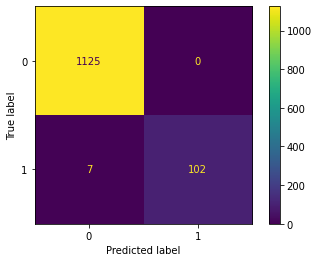

In [322]:
print('Training Set')
y_pred = model.predict(x_train) # predict with training set
print('')
plot_confusion_matrix(model, x_train, y_train) # plot the confusion matrix
print('')
print('Training Set Accuracy Score:  %.4f' %  model.score(x_train, y_train)) # get accuracy score
print(classification_report(y_train, y_pred)) # generate classification report to get evaluation metrics

Test Set



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Test Set Accuracy Score:  0.9376
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       495
           1       0.53      0.29      0.38        34

    accuracy                           0.94       529
   macro avg       0.74      0.64      0.67       529
weighted avg       0.93      0.94      0.93       529



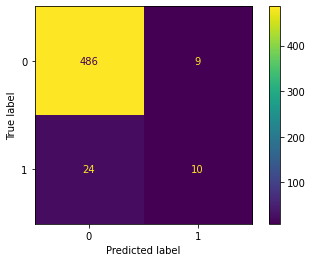

In [323]:
print('Test Set')
y_pred = model.predict(x_test) # predict with test set
print('')
plot_confusion_matrix(model, x_test, y_test) # plot the confusion matrix
print('')
print('Test Set Accuracy Score:  %.4f' %  model.score(x_test, y_test)) # get accuracy score
print(classification_report(y_test, y_pred)) # generate classification report to get evaluation metrics